# Introduction to Python for Scientists - Lesson 5


In [ ]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## Last Exercise

In [ ]:
stations = [f'Station {i}' for i in range(1, 4)]

stations

In [ ]:
random.seed(4)

stage_data = {}
first_day = datetime(2020, 1, 1)

for station in stations:

    print(f'Creating stage data for station {station}')

    # create a random series
    stages_list = [random.randint(50, 150)]
    for _ in range(364):
        stages_list.append(stages_list[-1] + random.randint(-2, 2))

    # create the stages dictionary with the dates and assign it to a specific station
    stage_data[station] = {first_day + timedelta(days=i): stage for i, stage in enumerate(stages_list)}



In [ ]:
plt.figure(figsize=(15, 5))

for station in stations:
    plt.plot(list(stage_data[station].keys()), list(stage_data[station].values()), label=station)

plt.legend()

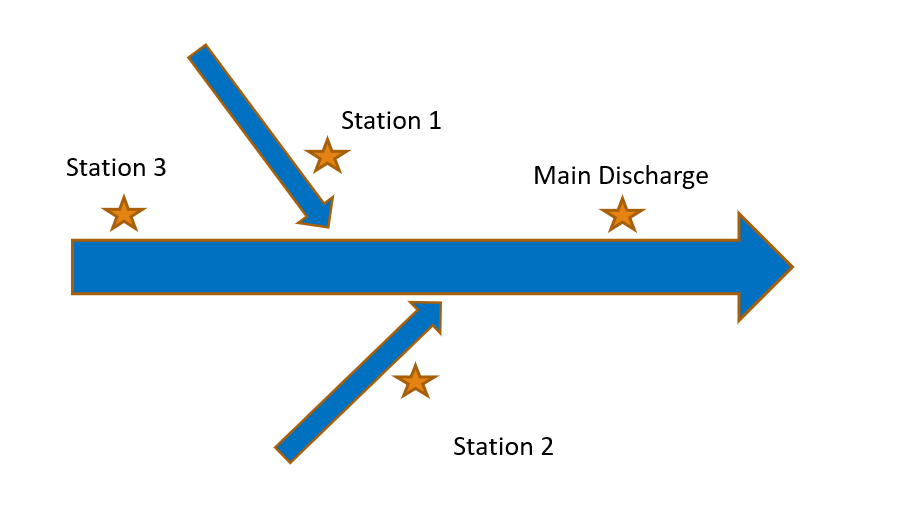

* The daily discharge on the main river?
* The mean discharge on the main river?
* The monthly mean discharge on the main river?
* The days of maximum and minimum discharge?

## Solution (brute-force)

In [ ]:
# extract the dates
dates = stage_data['Station 1'].keys()
dates = list(dates)
dates[:3]

In [ ]:
main_station = {}
for date in dates:
    q1 = stage_data['Station 1'][date]
    q2 = stage_data['Station 2'][date]
    q3 = stage_data['Station 3'][date]

    main_station[date]= q1 + q2 + q3

discharge_data = stage_data

discharge_data['Main Station'] = main_station

In [ ]:
plt.figure(figsize=(15, 5))

for station in discharge_data.keys():
    plt.plot(list(discharge_data[station].keys()), list(discharge_data[station].values()), label=station)

plt.legend()

In [ ]:
# Calculate the mean
total = 0
for date in dates:
    total += discharge_data['Main Station'][date]

mean = total / len(dates)
mean

In [ ]:
# Monthly mean
# ?????

date.month

In [ ]:
# create an empty dict
monthly_discharge = {}

# loop through each month 
for month in range(1, 13):
    monthly_total = 0

    # start a date counter (to count the numer of dates within that specific month)
    date_count = 0

    # loop through all the dates and check if it is the "correct" month
    for date in dates:

        if date.month == month:
            date_count += 1
            monthly_total += discharge_data['Main Station'][date]

    monthly_discharge[month] = monthly_total / date_count

monthly_discharge

## Pandas

In [ ]:
import pandas as pd

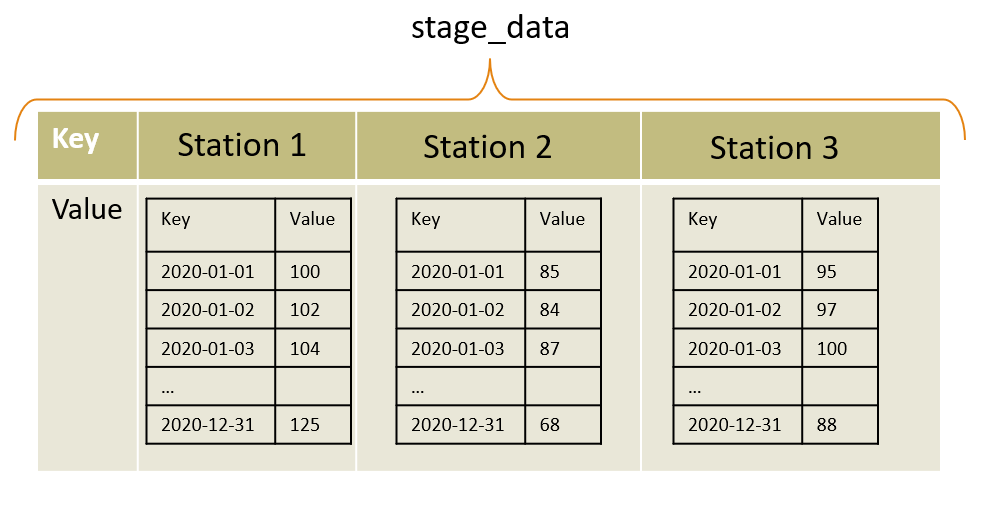

In [ ]:
df = pd.DataFrame(discharge_data)

In [ ]:
df

In [ ]:
df['Total Discharge'] = df['Station 1'] + df['Station 2'] + df['Station 3']

df

In [ ]:
df.mean()

In [ ]:
df.groupby(by=df.index.month).mean()

# Introduction to Pandas

https://jakevdp.github.io/PythonDataScienceHandbook/

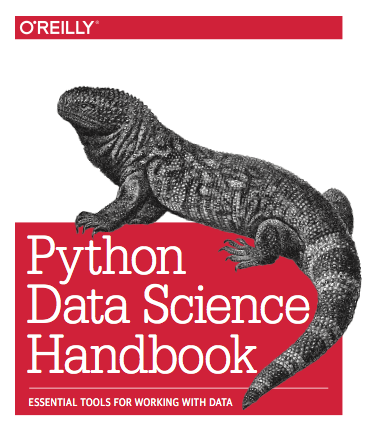

### Pandas Series

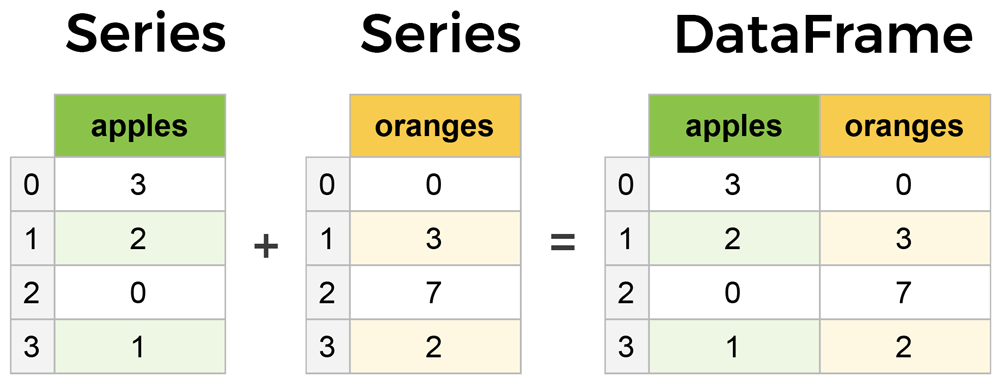

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

In [ ]:
data[1:3]

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

In [ ]:
# it behaves like a dictionary (index/key: value)???
data['b']

In [ ]:
# So, can I create a series from a dictionary? Let's check in the manual.
pd.Series?

In [ ]:
station1 = pd.Series(discharge_data['Station 1'])

station1

In [ ]:
discharge_data['Station 1']

In [ ]:
# What are the difference? Pros / cons?

discharge_data['Station 1'][datetime(2020, 7, 8)]

In [ ]:
station1[datetime(2020, 7, 8)]

In [ ]:
station1

In [ ]:
station1['2020-07-08':'2020-07-15']

In [ ]:
station1.plot()

In [ ]:
# keys
station1.index

In [ ]:
station1.values

In [ ]:
station1.sum() # min, max, mean, std

In [ ]:
station2 = pd.Series(discharge_data['Station 2'])
station3 = pd.Series(discharge_data['Station 3'])

main_station = station1 + station2 + station3
main_station

In [ ]:
# NOTE: the sum is performed aligned by the index

station1.plot()
station2.plot()
station3.plot()
main_station.plot()

In [ ]:
mean_discharge = main_station.mean()
mean_discharge

In [ ]:
mean_discharge.plot()

In [ ]:
# data = pd.Series([0.25, 0.5, 0.75, 1.0],
#                  index=['a', 'b', 'c', 'd'])

mean_discharge = pd.Series(mean_discharge, index=station1.index)

In [ ]:
mean_discharge.plot()
main_station.plot()


* The daily discharge on the main river?
* The mean discharge on the main river?
* The monthly mean discharge on the main river?
* The days of maximum and minimum discharge?

In [ ]:
main_station.max(), main_station.min()

In [ ]:
main_station[main_station == main_station.min()]

In [ ]:
main_station[main_station == main_station.max()]


In [ ]:
# positional indexing with iloc
main_station.iloc[3:5]

In [ ]:
main_station

In [ ]:
main_station[3:5]

In [ ]:
data

In [ ]:
data[[True, False, True, False]]

In [ ]:
# what is returned when we perform
data == 0.5

In [ ]:
data[data==0.5]

In [ ]:
main_station[main_station==222]